Fase 1: Exploración y Limpieza
Exploración Inicial:
Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [2]:
import pandas as pd

In [3]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar los archivos CSV
customer_flight_df = pd.read_csv('Customer Flight Activity.csv')
customer_loyalty_df = pd.read_csv('Customer Loyalty History.csv')

Fase 1: Exploración y Limpieza

In [5]:
# Mostrar las primeras filas de cada conjunto de datos
print(customer_flight_df.head())
print(customer_loyalty_df.head())

   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3             

1.1. Exploración inicial

In [8]:
# Exploración inicial de 'Customer Flight Activity.csv'
print("Exploración inicial del archivo Customer Flight Activity.csv")
print(customer_flight_df.info())  # Información general sobre tipos de datos y valores nulos
print(customer_flight_df.describe())  # Estadísticas básicas para identificar posibles valores atípico


Exploración inicial del archivo Customer Flight Activity.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None
       Loyalty Number           Year          Month  Flights Boo

In [9]:
# Exploración inicial de 'Customer Loyalty History.csv'
print("\nExploración inicial del archivo Customer Loyalty History.csv")
print(customer_loyalty_df.info())  # Información general sobre tipos de datos y valores nulos
print(customer_loyalty_df.describe())  # Estadísticas básicas para identificar posibles valores atípicos


Exploración inicial del archivo Customer Loyalty History.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   floa

In [17]:
# Revision of the name of all the columns of the DataFrame
customer_flight_df.columns
customer_loyalty_df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [19]:
# Review the main statistical data of the DataFrame
customer_flight_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [20]:
customer_loyalty_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [10]:
# Identificación de valores nulos en ambos conjuntos de datos
print("\nValores nulos en 'Customer Flight Activity.csv':")
print(customer_flight_df.isnull().sum())  # Valores nulos por columna en datos de vuelo. No existen valores nulos.


Valores nulos en 'Customer Flight Analysis.csv':
Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64


In [11]:
print("\nValores nulos en 'Customer Loyalty History.csv':")
print(customer_loyalty_df.isnull().sum())  # Valores nulos por columna en datos de lealtad


Valores nulos en 'Customer Loyalty History.csv':
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [ ]:
#Sí existen 3 columnas con datos nulos: Salary, Cancellation Year y Cancellarion Month

In [ ]:
#Unificar los datos:

In [36]:
# Unión de los dos conjuntos de datos en base al 'Loyalty Number'
merged_data = pd.merge(customer_flight_df, customer_loyalty_df, on='Loyalty Number', how='inner')

# Verificación de la estructura del conjunto de datos combinado
print("\nEstructura del conjunto de datos unificado:")
print(merged_data.info())
print(merged_data.head())


Estructura del conjunto de datos unificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Loyalty Number               405624 non-null  int64         
 1   Year                         405624 non-null  int64         
 2   Month                        405624 non-null  int64         
 3   Flights Booked               405624 non-null  int64         
 4   Flights with Companions      405624 non-null  int64         
 5   Total Flights                405624 non-null  int64         
 6   Distance                     405624 non-null  int64         
 7   Points Accumulated           405624 non-null  float64       
 8   Points Redeemed              405624 non-null  int64         
 9   Dollar Cost Points Redeemed  405624 non-null  int64         
 10  Country                      405624 non-null  c

1.2. Limpieza de Datos:

In [37]:
#Gestión de Nulos.
##Vamos a sustituir los valores nulos de Salary por el valor medio de esa columna:


#Imputar los valores nulos en 'Salary' con la media
merged_data['Salary'].fillna(merged_data['Salary'].mean(), inplace=True)



C:\Users\usuario\AppData\Local\Temp\ipykernel_10712\1019071711.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Salary'].fillna(merged_data['Salary'].mean(), inplace=True)


In [38]:
#Confirmar que ya no hay valores nulos en 'Salary'
print(merged_data['Salary'].isnull().sum())

0


In [39]:
# En 'Cancellation Year' y 'Cancellation Month'tambiñen existen datos nulos. Como desconocemos este dato, vamos a sustituir los valores nulos por "Unknown" y lo dejaremos así


# Sustituir valores nulos en 'Cancellation Year' y 'Cancellation Month' por "Unknown"
merged_data['Cancellation Year'].fillna("Unknown", inplace=True)
merged_data['Cancellation Month'].fillna("Unknown", inplace=True)


C:\Users\usuario\AppData\Local\Temp\ipykernel_10712\2780133356.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Cancellation Year'].fillna("Unknown", inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_10712\2780133356.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [40]:
# Confirmar que ya no hay valores nulos en estas columnas
print(merged_data[['Cancellation Year', 'Cancellation Month']].isnull().sum())

Cancellation Year     0
Cancellation Month    0
dtype: int64


In [ ]:
#Ya no hay valores nulos en los datos.

In [41]:
# Verificar valores únicos en columnas de tipo categórico en 'loyalty_data' para asegurar consistencia
categorical_columns_loyalty = ['Country', 'Province', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']
loyalty_categorical_values = {col: merged_data[col].unique() for col in categorical_columns_loyalty}


In [42]:
# Verificar valores de las columnas de tipo numérico en 'flight_data' para detectar posibles valores inusuales
flight_data_summary_stats = merged_data.describe()

loyalty_categorical_values, flight_data_summary_stats

({'Country': ['Canada']
  Categories (1, object): ['Canada'],
  'Province': ['Alberta', 'Ontario', 'British Columbia', 'Saskatchewan', 'Quebec', ..., 'Manitoba', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island', 'Yukon']
  Length: 11
  Categories (11, object): ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', ..., 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon'],
  'Gender': ['Female', 'Male']
  Categories (2, object): ['Female', 'Male'],
  'Education': ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']
  Categories (5, object): ['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
  'Marital Status': ['Married', 'Single', 'Divorced']
  Categories (3, object): ['Divorced', 'Married', 'Single'],
  'Loyalty Card': ['Aurora', 'Nova', 'Star']
  Categories (3, object): ['Aurora', 'Nova', 'Star'],
  'Enrollment Type': ['Standard', '2018 Promotion']
  Categories (2, object): ['2018 Promotion', 'Standard']},
        Loyalty Number     

In [43]:
# 1. Convertir las columnas de año y mes en tipo datetime para análisis temporal
# Concatenamos 'Enrollment Year' y 'Enrollment Month' para crear una columna de fecha de inscripción
merged_data['Enrollment Date'] = pd.to_datetime(merged_data['Enrollment Year'].astype(str) + '-' + 
merged_data['Enrollment Month'].astype(str) + '-01', errors='coerce')

# 2. Convertir 'Cancellation Year' y 'Cancellation Month' en fecha, ignorando valores 'Unknown'
# Primero reemplazamos 'Unknown' con NaN para convertir a fechas
merged_data['Cancellation Year'].replace('Unknown', pd.NA, inplace=True)
merged_data['Cancellation Month'].replace('Unknown', pd.NA, inplace=True)

merged_data['Cancellation Date'] = pd.to_datetime(merged_data['Cancellation Year'].astype(str) + '-' + 
merged_data['Cancellation Month'].astype(str) + '-01', errors='coerce')

# 3. Cambiar columnas categóricas a tipo 'category' para optimizar
categorical_columns = ['Country', 'Province', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']
for col in categorical_columns:
    merged_data[col] = merged_data[col].astype('category')

# 4. Asegurarse de que 'Salary' y 'CLV' son numéricos
merged_data['Salary'] = pd.to_numeric(merged_data['Salary'], errors='coerce')
merged_data['CLV'] = pd.to_numeric(merged_data['CLV'], errors='coerce')



C:\Users\usuario\AppData\Local\Temp\ipykernel_10712\3323541471.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Cancellation Year'].replace('Unknown', pd.NA, inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_10712\3323541471.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [44]:
# Revisar la estructura de los datos para confirmar cambios
print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Loyalty Number               405624 non-null  int64         
 1   Year                         405624 non-null  int64         
 2   Month                        405624 non-null  int64         
 3   Flights Booked               405624 non-null  int64         
 4   Flights with Companions      405624 non-null  int64         
 5   Total Flights                405624 non-null  int64         
 6   Distance                     405624 non-null  int64         
 7   Points Accumulated           405624 non-null  float64       
 8   Points Redeemed              405624 non-null  int64         
 9   Dollar Cost Points Redeemed  405624 non-null  int64         
 10  Country                      405624 non-null  category      
 11  Province                  

Fase 2: Visualización

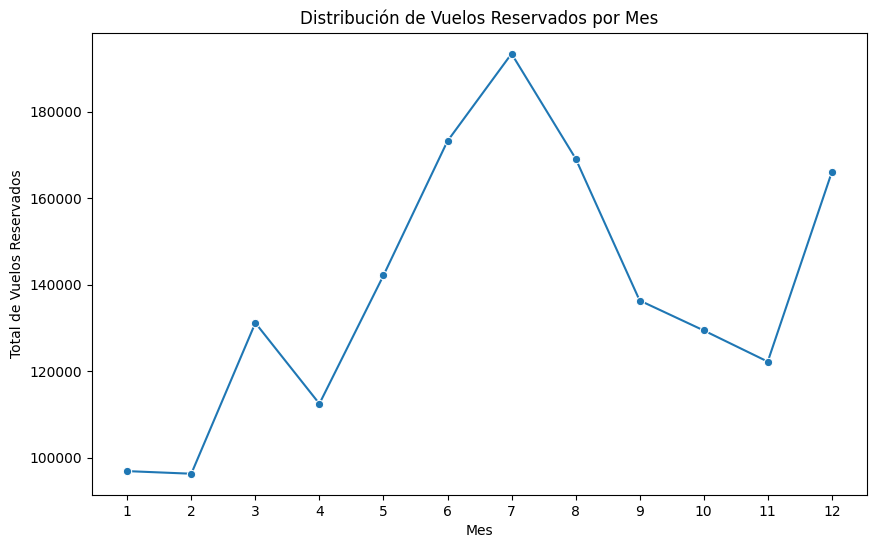

In [47]:
#1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


# Agrupar los vuelos reservados por mes
monthly_flights = merged_data.groupby('Month')['Flights Booked'].sum()

# Graficar la tendencia mensual de vuelos reservados
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_flights.index, y=monthly_flights.values, marker='o')
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Vuelos Reservados')
plt.xticks(range(1, 13))
plt.show()

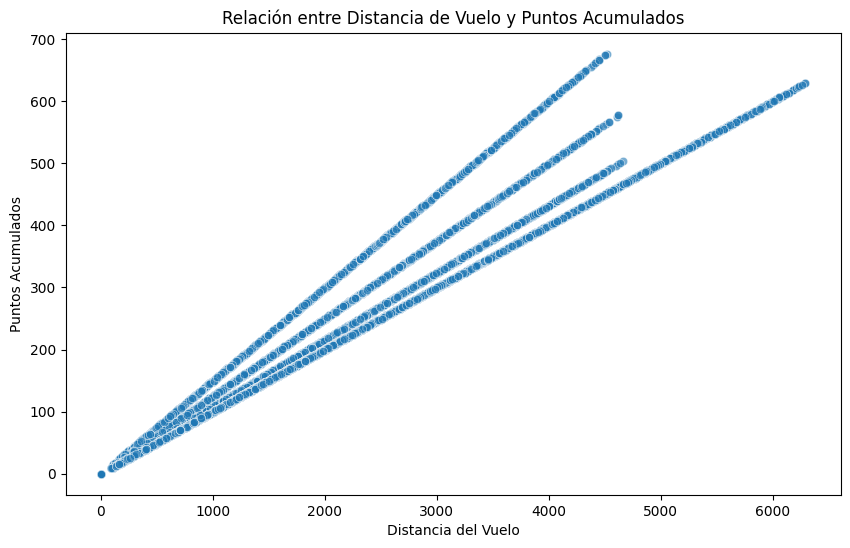

In [48]:
#2. Relación entre Distancia de los Vuelos y Puntos Acumulados por los Clientes

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Distance', y='Points Accumulated', alpha=0.6)
plt.title('Relación entre Distancia de Vuelo y Puntos Acumulados')
plt.xlabel('Distancia del Vuelo')
plt.ylabel('Puntos Acumulados')
plt.show()

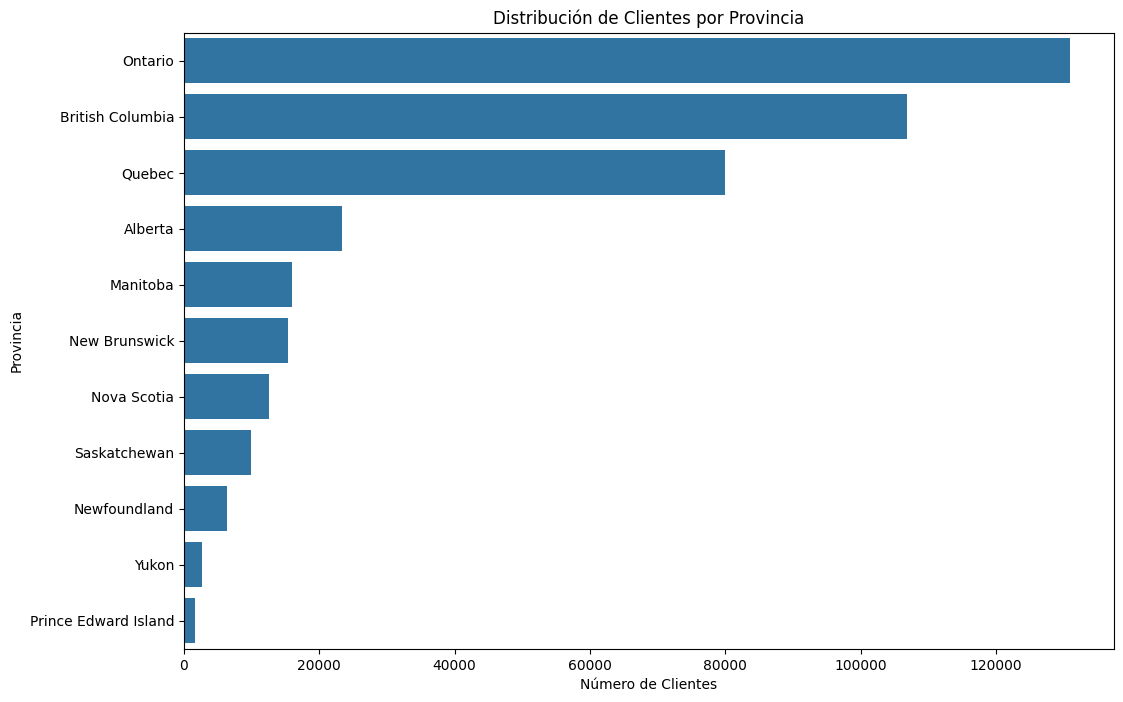

In [49]:
#3. Distribución de Clientes por Provincia o Estado


plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, y='Province', order=merged_data['Province'].value_counts().index)
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia')
plt.show()


C:\Users\usuario\AppData\Local\Temp\ipykernel_10712\177587414.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_data, x='Education', y='Salary', estimator='mean', ci=None)


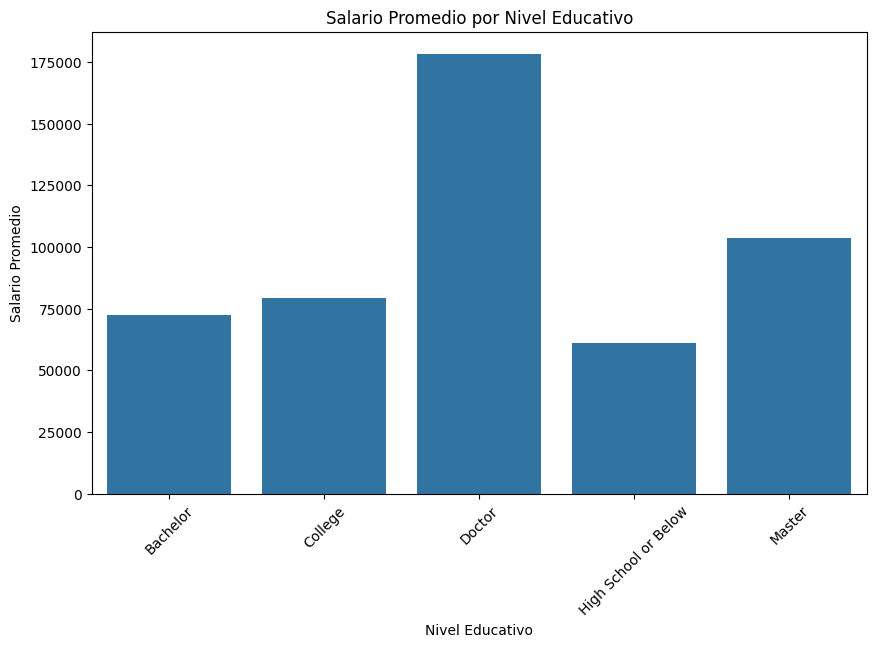

In [50]:
#4. Comparación del Salario Promedio entre Niveles Educativos

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Education', y='Salary', estimator='mean', ci=None)
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)
plt.show()

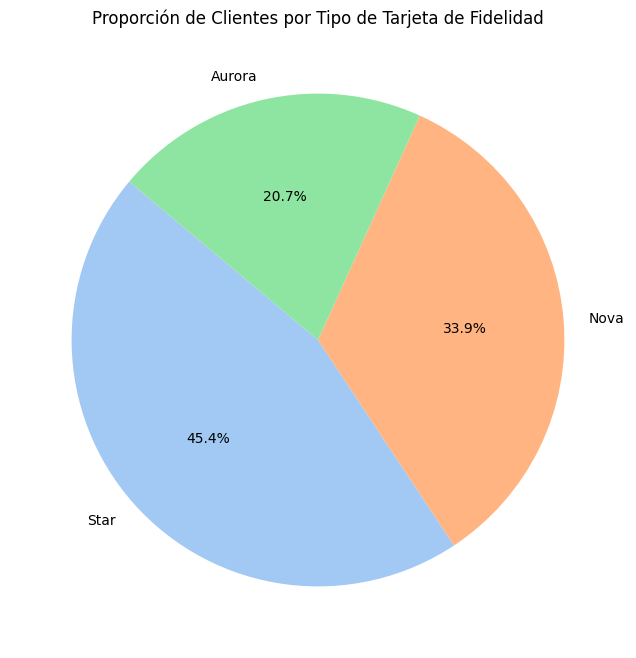

In [51]:
#5. Proporción de Clientes con Diferentes Tipos de Tarjetas de Fidelidad

plt.figure(figsize=(8, 8))
merged_data['Loyalty Card'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.ylabel('')
plt.show()

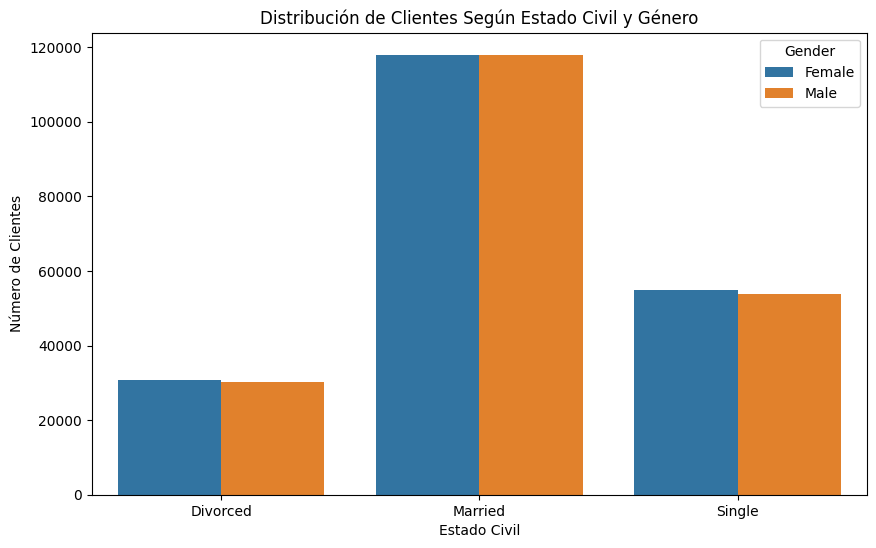

In [52]:
#6. Distribución de Clientes Según Estado Civil y Género

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Marital Status', hue='Gender')
plt.title('Distribución de Clientes Según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.show()